# Машинное обучение

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Предобработка данных

### Работа с пропусками с категориальными данными

- заменить на "неизвестно"
- заменить наиболее популярным значением
- дропнуть

### Работа с пропусками с числовыми данными

- заменить на среднее значение
- `ffill`/`bfill`/`interpolate`, где это имеет смысл (например, во временных рядах)
- дропнуть


### Нормализация числовых признаков

- привести к диапазону от 0 до 1 по формуле

$x_{new} = \frac{x - x_{min}}{x_{max} - x_{min}}$

- вычесть среднее и разделить на среднеквадратичное отклонение

$x_{new} = \frac{x - x_{mean}}{\sigma}$

### Обработка категориальных признаков

- OneHotEncoding - заменяем колонку с $n$ значениями на $n$ колонок, в каждой из которых стоит 0 или 1, в зависимости от того, принадлежит ли объект этой категории. Универсальный способ, но значительно увеличивает размерность в данных (нужно много данных, чтобы модель хорошо обучилась).
- Закодировать категорию от 1 до n. Хорошо сработает, если категории можно упорядочить (например, год выпуска машины, грейд работника) или если всего две категории (например, пол) и нет смысла добавлять вторую колонку как в one hot encoding.
- Не используем категориальный признак


## Задача

Для данных о погоде создать категорию "время года" и закодировать ее при помощи OneHotEncoder. Проще всего применить OneHotEncoder при помощи `pandas.get_dummies()`

Преобразовать данные о температуре двумя способами.

In [54]:
# Пример

series = pd.Series(['blue', 'red', 'blue', 'red', 'green'])
pd.get_dummies(series)

,blue,green,red
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0


In [55]:
# Ваш код здесь


## Модель случайного леса

Обучим 100 деревьев решений на разных подмножествах обучающей выборки (выбирая для каждого дерева случайные строки и столбцы из $X$). 

Ответ будем получать голосованием.

Например, за то, что объект принадлежит классу 1 проголосовало 90 деревьев, а за то, что объект принадлежит классу 2, проголосовало 10 деревьев. Итого - берем ответ 1.

Такая модель называется моделью случайного леса

Основные аргументы:

- `n_estimators` - максимальное число деревьев в лесу
- `criterion` - критерий для создания узла: или критерий Джини gini (по умолчанию), или энтропия entropy.
- `max_depth` - максимальная глубина дерева
- `max_features` - максимальное число атрибутов, которые будут проверены при создании узла, по умолчанию это равно корню квадратному из числа всех атрибутов в данных.
- `max_samples` - максимальное число примеров используемых для одного дерева (примеры выбираются случайно).


Сам объект RandomForestClassifier имеет поля:

- `estimators_` - список объектов деревьев (типа DecisionTreeClassifier) в этом лесу
- `classes_` - метки классов
- `n_classes_` - число классов
- `n_features_` - число атрибутов
- `n_outputs_` - число выходов
- `feature_importances_` - оценка важности атрибутов. Очень полезные сведения, показывающие какой вклад дает тот или иной атрибут в точность решения задачи. Полезно, например, для существенного уменьшения размера дерева: удалив атрибуты с малой важностью не сильно потеряем в точности. Полезно и для интерпретируемости результатов. Вычисляется как суммарная величина уменьшения критерия неопределенности для этого атрибута.

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [9]:
data = load_digits()
x = data.data
y = data.target

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [12]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.9711111111111111

In [13]:
confusion_matrix(y_test, y_pred)

array([[47,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0, 40,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 49,  0,  1,  0,  0,  2,  0],
       [ 0,  0,  0,  0, 45,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 42,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0, 45,  0,  1,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 42,  0,  0],
       [ 0,  2,  0,  0,  0,  1,  0,  0, 44,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  3,  0, 43]], dtype=int64)

## Задача

Перебрать параметры `n_estimators`, `criterion` и `max_depth` и найти оптимальные. 

Для решения можно написать тройной цикл, в каждом из которых можно перебирать значения параметров.

In [17]:
def get_accuracy_of_model(x_train, y_train, x_test, y_test, n_estimators, criterion, max_depth):
    """Функция принимает на вход треин и тест выборки и параметры модели. На выходе дает accuracy."""
    model = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    return accuracy_score(y_test, y_pred)

In [1]:
n_estimators = [5, 100, 300, 500]
criterions = ['gini', 'entropy']
max_depths = [3, 5, 7, 10]

# Ваш код здесь


## Подбор гиперпараметров модели

Иногда нужно перебирать множество параметров и не хочется писать много циклов. Для таких случаев в sklearn реализован `GridSearchCV` и `RandomSearchCV`.

In [4]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [35]:
params = {
    'n_estimators': [5, 100, 500, 1000],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10]
}

In [36]:
%%time
search = GridSearchCV(RandomForestClassifier(), params)
search.fit(x_train, y_train)
search.best_estimator_

Wall time: 2min 54s


RandomForestClassifier(max_depth=10, n_estimators=1000)

In [37]:
%%time
r_search = RandomizedSearchCV(RandomForestClassifier(), params)
r_search.fit(x_train, y_train)
r_search.best_estimator_

Wall time: 1min 2s


RandomForestClassifier(max_depth=10, n_estimators=1000)

## Задача

Построить модель SGDClassifier и осуществить подбор гиперпараметров при помощи случайного поиска (список гиперпараметров можно посмотреть в документации).

In [5]:
from sklearn.linear_model import SGDClassifier

In [ ]:
# Ваш код здесь


## Ансамблевые модели

Объединяя множество простых моделей в одну сложную, можно получить результат гораздо лучше.

Есть несколько способов создания ансамблей:

- **Бэггинг** (Bagging, сокращение от Bootstrap Aggregation) - однородные модели (из одного класса) обучаются независимо друг от друга на разных случайных подвыборках и разных признаках. Итоговый прогноз считается при помощи голосования моделей. Пример: случайный лес
- **Бустинг** - однородные модели строятся последовательно, каждая следующая модель старается минимизировать ошибку предыдущей. Пример: градиентный бустинг
- **Стекинг** - разнородные модели обучаются на всех данных (или на подвыборках) и поверх них строится модель, которая минимизирует общую ошибку.

На основе стекинга можно строить очень сложные модели, которые будут долго обучаться и иметь очень высокую точность.

## Градиентный бустинг

Идея бустинга заключается в следующем:

* Пусть мы имеем входы $X$ и указания учителя $Y$.
* Обучим первую модель на этих данных, если модель простая,  то обучение будет не очень точным и выход модели будет $F1$, а должны были получить $Y$
* Обучим вторую модель на тех же данных, но для нее указания учителя сделаем $Y-F1$, получим выход $F2$, который тоже может отличаться от желаемого. 
* тогда обучим третью модель, для которой указания учителя будут $Y-F2$, получим выход $F3$.
* будем продолжать обучать все новые и новые модели, пока не надоест или пока не достигнем хорошего обучения или других критериев останова. 
* Результат ансамбля, выход $F=F1+F2+F3+...$

Если внимательно присмотреться, то величина $(Y - F1)$ это градиент по $F1$ (со знаком минус) от средневквадратичной ошибки \\(0.5*(Y-F1)^2\\), потому такой бустинг называют ["градиентный бустинг"](https://en.wikipedia.org/wiki/Gradient_boosting), а величины $(Y - F1)$ - "остатками" (residuals). 

Обычно для градиентного бустинга используют следующие библиотеки:

- XGBoost
- CatBoost
- LightGBM

В классе мы будем использовать реализацию в sklearn, а в домашней работе предлагаю использовать XGBoost или любую другую реализацию из этих трех.

## Задача

Обучить модель градиентного бустинга на датасете, провести подбор гиперпараметров (взять любые 3 штуки, их список можно получить через документацию к модели).

Сравнить качество с полученными ранее результатами.

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Ваш код здесь


## Стекинг

В случае, когда разные модели совершают разные ошибки, можно использовать стекинг.

In [40]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
estimators = [
    ('LogReg', LogisticRegression()),
    ('Tree', DecisionTreeClassifier())
]
clf=StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

## Задача 

Добавить в стекинг еще несколько классификаторов (можно взять классификаторы из прошлых заданий) и получить финальный результат.

In [ ]:
# Ваш код здесь


## Задача

Иногда нужно использовать модели, у которых интерфейс отличается от интерфейса моделей из sklearn и тогда приходится самостоятельно реализовывать стекинг.

Задача 

Алгоритм построения стекинга:
- Получить прогнозы базовых моделей
- Использовать прогнозы базовых моделей в качестве признаков для финализирующей модели
- Оформить модель в отдельную функцию

In [ ]:
# Ваш код здесь


## Задача

Построить стекинговую регрессионную модель для данных о стоимости домов. Подобрать гиперпараметры для каждой базовой модели, оценить финальное качество.

In [3]:
from sklearn.datasets import load_boston
data = load_boston()
 
# Ваш код здесь


# Еще несколько моделей классификации

Во всех алгоритмах ниже будет рассмотрена задача бинарной классификации

## [Support Vector Machine](https://habr.com/ru/post/105220/)

В базовой версии этот алгоритм очень похож на логистическую регрессию - мы строим разделяющую прямую, которая разделяет плоскость на две части.

Классифицирующая функция выглядит так: $F(x) = sign((w, x) + b)$. То есть, возвращает $+1$ или $-1$, в зависимости от того, какому классу принадлежит объект $x$.

Часто мы можем построить несколько прямых, поэтому мы хотим найти прямую с максимальным расстоянием до выборки.

Можно показать, что расстояние до выборки равно $\frac{1}{||w||}$. Вместо задачи максимизации обычно берут задачу минимизации и минимизируют $||w||^2$, что является эквивалентной задачей.

Формально это можно записать так:

$argmin ||w||^2$

$y_i ((w, x_i) + b) \geq 1$

С послденим уравнением стоит разобраться. Здесь нам интересны знаки $y_i$ и $(w, x_i) + b$. Если эти выражения будут иметь одинаковые знаки (либо оба плюса, либо оба минуса), то мы правильно решили задачу классификации. Если знаки отличаются, то результат получится отрицательным, и задача решена неверно.

В sklearn этот метод называется `SVC` - support vector classifier. Также есть алгоритм кластеризации support vector clustering, но он не реализован в sklearn.

In [10]:
from sklearn.svm import SVC

Сгенерируем случайную выборку и случайные для нее ответы и запустим `SVC`.

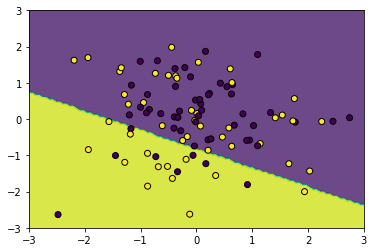

In [156]:
model = SVC(kernel='linear')

n = 100
x = np.random.normal(size=(n, 2))
y = np.random.randint(0, 2, size=(n,))

model.fit(x, y)

x1_plot = np.linspace(-3, 3, 100)
x2_plot = np.linspace(-3, 3, 100)
x1_mesh, x2_mesh = np.meshgrid(x1_plot, x2_plot)
x_plot = np.vstack((x_mesh.ravel(), y_mesh.ravel())).T

res = model.predict(x_plot).reshape(x1_mesh.shape)
plt.contourf(x1_mesh, x2_mesh, res, alpha=0.8)
plt.scatter(x[:, 0], x[:, 1], c=y, edgecolor='black')

Как можно заметить, если выборка не разделяется линейно, то модель работает не слишком хорошо. В таком случае используют другие ядра - например, `rbf` и `poly`.

Математически это означает, что в функции $F(x) = sign((w, \phi (x)) + b)$ вводится новая функция $\phi(x)$, которая преобразует исходные данные к более простому для модели виду.

В случае с линейным ядром, эта функция равна $\phi(x) = x$. Про остальные ядра можно почитать по ссылке выше.

## Задача

Запустить `SVC` на датасете с цифрами, подобрать лучшее ядро при помощи случайного поиска по сетке

## [kNN](https://habr.com/ru/post/149693/)

Модель K ближайших соседей отличается от всех предыдущих по принципу работы. Ранее мы оценивали коэффициенты модели по обучающей выборке, но модель kNN не нуждается в обучении как таковом.

Принцип работы следующий:

- Получаем новый объект из тестовой выборки
- Считаем расстояние до всех ближайших объектов из тренировочной выборки
- Находим К ближайших соседей
- Ответ получаем как голосование этих К соседей

Как мы можем заметить, у модели есть всего один параметр - К. Его всегда подбирают в зависимости от выборки. 

Также можно выбрать метрику для подсчета расстоярния между объектами и способ поиска ближайших соседей.

Модель очень простая, поэтому редко работает хорошо. Также модель будет медленно работать с данными большой размерности

In [161]:
from sklearn.neighbors import KNeighborsClassifier

## Задача

Применить модель к датасету с цифрами. Подобрать оптимальное количество соседей.

In [162]:
model = KNeighborsClassifier(n_neighbors=5)
# Ваш код здесь


## [Наивный байесовский классификатор](https://habr.com/ru/post/120194/)

НБК - это простой, но довольно полезный алгоритм классификации, который полностью построен на теореме Байеса.

Пусть у нас есть элемент $x$, который может пренадлежать одному из классов $c \in C$. Тогда нам нужно при какой метке класса вероятность принадлежности будет максимальная:

### $c_{opt} = argmax_{c} P(c|x)$

Используя теорему Байеса вероятность можно переписать так:

### $P(c|x) = \frac {P(x|c)P(c)} {P(x)}$

Вектор $x$ состоит из признаков $x_1, \dots, x_n$, поэтому формулу можно записать так:

### $P(c|x_1 \dots x_n) = \frac {P(x_1 \dots x_n | c) P(c)} {P(x_1 \dots x_n)}$

Значение в знаменателе нас не интересует, так как это константа, а нам нужно найти максимум.

Выражение выглядит довольно сложно, поэтому сделаем предположение, что признаки между собой независимы (например, возраст и пол пассажира на титанике, или значение в первом и втором пикселе на картинке). Тогда можно переписать числитель так:

### $P(x_1 \dots x_n | c) P(c) = P(c) P(x_1|c) P(x_2 | c) \dots P(x_n| c) = P(c) \prod_{i} P(x_i|c)$

Запишем исходную задачу, используя эти формулы:

### $c_{opt} = argmax_{c} = argmax_{c} P(c) \prod_{i} P(x_i|c)$

Все эти значения мы можем посчитать:

- $P(c)$ - вероятность встретить класс в выборке
- $P(x_i|c)$ - вероятность, что встретим значение $x_i$ при классе $c$

Подсчет этих значений и есть обучение классификатора.

Алгоритм требует немного данных для работы, довольно быстро работает (градиентных спусков нет, хранить в памяти тоже почти ничего не нужно) и часто обходит в точности другие, более сложные, алгоритмы (деревья решений и логистическую регрессию, например).

Также немаловажный плюс - можно задать априорные вероятности классов $P(c)$, если у нас скошенная выборка, либо мы знаем об ошибке в сборе данных.

Однако есть недостаток - алгоритм предполагает, что признаки независимы, а это не так в случае со словами в тексте, например.

In [163]:
from sklearn.naive_bayes import GaussianNB

## Задача

Попробовать НБК на данных о цифрах. 

## Задача

Построить стекинг на основе всех моделей, которые мы разобрали выше. Получилось ли обойти Random Forest?

# Домашняя работа

Будем работать с датасетом подержанных машин https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes.

Задача - построить прогноз цены машины по ее данным (год выпуска, пробег, расход, размер двигателя, тип коробки передач и тд). 

Это задача регрессии, поэтому нужно использовать модели регрессоры, а не классификаторы (например, не `StackingClassifier`, а `StackingRegressor`).

## Easy

Взять один файл с маркой машины.

Построить прогноз, используя модели линейной регрессии и случайного леса. Сравнить результаты, используя кросс-валидацию. Подобрать гиперпараметры моделей (для линейной регрессии можно использовать реализацию с градиентным спуском `SGDRegressor`). Оценить качество, используя метрику `r2_score`. Оценить важность признаков (параметр `feature_importance_` у случайного леса).

## Normal

Объединить в один датафрейм данные по всем маркам машин. Преобразовать категориальные признаки.

Построить еще несколько моделей, используя подбор гиперпараметров. Сравнить между собой все построенные модели.

## Hard

Построить модель стекинга над всеми моделями из задачи Normal + добавить один из градиентных бустингов XGBoost/LightGBM/CatBoost, если они не использовались. Удалось ли улучшить результат?

# Полезные ссылки

- [Наивный байесовский классификатор](http://datareview.info/article/6-prostyih-shagov-dlya-osvoeniya-naivnogo-bayesovskogo-algoritma-s-primerom-koda-na-python/)
- [AdaBoost](https://habr.com/ru/company/otus/blog/503888/)
- [K ближайших соседей (kNN)](https://habr.com/ru/post/149693/)
- [Метод опорных векторов (SVM)](https://habr.com/ru/post/105220/)